<a href="https://colab.research.google.com/github/Chief-Buka/Reinforcement-learning/blob/main/10_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def initialize_arms(number_of_arms):
  #initialize the means of the arms using normal distribution (mean=0, std=1) 
  means = []
  for i in range(number_of_arms):
    means.append(np.random.normal(0, 1))

    #for each arm initialize the distribution using mean=prev_mean and std=1
  arms = []
  for i in range(number_of_arms):
    arms.append({'mean': means[i], 'std': 1})
  return arms

In [ ]:
def initialize_e_greedy_values():
  #initialize the different epsilon-greedy values(e-g values)
  return [1, .6, .2, .06, .02, .006, 0]

In [ ]:
def initialize_tables(number_of_arms, e_greedy_values):
  #Initialize the sample-average table(Q) and the number-of-actions-per-arm table(N)
  Q = dict()
  N = dict()
  for e_g in e_greedy_values:
    Q[e_g] = [0] * number_of_arms
    N[e_g] = [0] * number_of_arms
  return Q, N


In [ ]:
def run_bandits(arms, e_greedy_values, Q, N, num_steps=10000):

  #Track total reward
  total_rewards = dict()
  for e_g in e_greedy_values:
    total_rewards[e_g] = 0

  #For graphing the values
  rewards = dict()
  for e_g in e_greedy_values:
    rewards[e_g] = []

  #Loop
  for step in range(num_steps):
    #For each epsilon-greedy value
    for e_g in e_greedy_values:

    #Choose action(arm) based on epsilon values 
      chance = np.random.uniform(0, 1)

      if (chance < e_g):
        action = random.randint(0, len(arms)-1)
      else:
        action = np.argmax(Q[e_g])
    #Get reward from that action
      reward = np.random.normal(arms[action]['mean'], arms[action]['std'])

      total_rewards[e_g] += reward

      #For plotting
      rewards[e_g].append(reward)
    #Update table (N) and update table (Q)
      N[e_g][action]+=1
      Q[e_g][action] = Q[e_g][action] + (1/(N[e_g][action]))*(reward - Q[e_g][action])


  return total_rewards, rewards

In [ ]:
#Normal 
number_of_arms = 10
arms = arms = initialize_arms(number_of_arms)
e_greedy_values = initialize_e_greedy_values()


avg_rewards = dict()
for e_g in e_greedy_values:
  avg_rewards[e_g] = [0]*1000

for i in range(2000):
  Q, N = initialize_tables(number_of_arms, e_greedy_values)
  total_rewards, rewards = run_bandits(arms, e_greedy_values, Q, N, 1000)

  for e_g in e_greedy_values:
    for i in range(1000):
      avg_rewards[e_g][i] += rewards[e_g][i]

for e_g in e_greedy_values:
  for i in range(1000):
    avg_rewards[e_g][i] /= 2000

print(total_rewards)

{1: -127.10403670534383, 0.6: 678.0145039683945, 0.2: 1424.775570260953, 0.06: 1377.8780434675657, 0.02: 1408.50459909836, 0.006: 1478.6315268736791, 0: 1444.7487892558222}


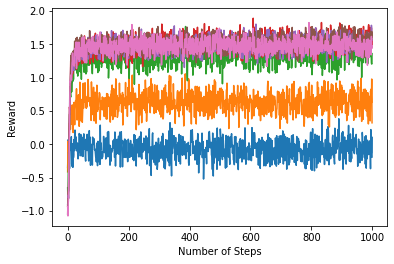

In [ ]:
x = [i for i in range(1000)]
for e_g in e_greedy_values:
  y = avg_rewards[e_g]
  plt.plot(x, y)

plt.plot()
plt.xlabel('Number of Steps')
plt.ylabel('Reward')
plt.show()


